Report and Metrics Generation
----

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, RocCurveDisplay
sys.path.append("../src")
import utils

In [3]:
model_files = os.listdir('../models/')
model_files.sort(reverse=True, key=lambda name: int(name[-16:-4]))
with open('../models/'+model_files[0],'rb') as f:
    model = pickle.load(f)
type(model)

dict

In [4]:
model

{'best_score': 0.9254911754692154,
 'best_params': {'xgbclassifier__learning_rate': 0.029992608994468213,
  'xgbclassifier__max_depth': 11,
  'xgbclassifier__min_child_weight': 26},
 'best_estimator': Pipeline(steps=[('mccrates', MCCRates()),
                 ('makedummies',
                  MakeDummies(drop_first=False, multicat_col='errors')),
                 ('xgbclassifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, g...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=0.0299926089944682

In [5]:
X_test = pd.read_csv(utils.prepend_dir('tx_test.csv'), index_col=0)
y_test = X_test.is_fraud
X_test.drop(columns='is_fraud', inplace=True)
y_pred = model['best_estimator'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96   1175292
        True       0.02      0.93      0.03      1415

    accuracy                           0.93   1176707
   macro avg       0.51      0.93      0.50   1176707
weighted avg       1.00      0.93      0.96   1176707



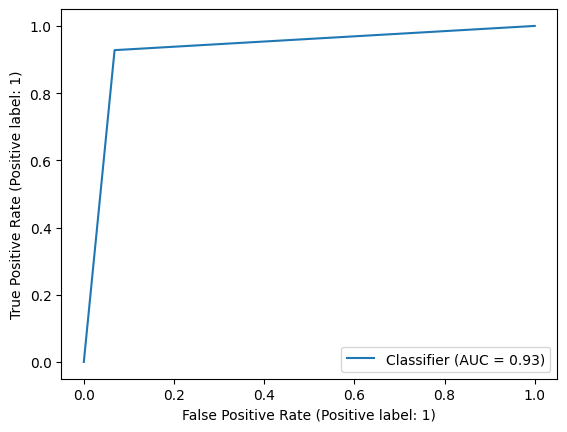

In [6]:
display = RocCurveDisplay.from_predictions(y_test, y_pred)

In [14]:
print(y_test.mean()*.75/model['prec75'])

0.010949839728483608


In [7]:
print(X_test.shape)
print(X_test.columns)

(1176707, 27)
Index(['user', 'card', 'amount', 'mcc', 'errors', 'tx_type', 'card_brand',
       'card_type', 'has_chip', 'cards_issued', 'credit_limit', 'gender',
       'latitude', 'longitude', 'per_capita_income_zipcode',
       'yearly_income_person', 'total_debt', 'fico_score', 'num_credit_cards',
       'home_city', 'home_state', 'home_zip', 'overseas', 'user_age',
       'retired', 'until_expired', 'since_opened'],
      dtype='object')


In [10]:
print(model['best_estimator'].named_steps['xgbclassifier'].feature_names_in_)

['user' 'card' 'amount' 'has_chip' 'cards_issued' 'credit_limit'
 'latitude' 'longitude' 'per_capita_income_zipcode' 'yearly_income_person'
 'total_debt' 'fico_score' 'num_credit_cards' 'home_city' 'home_state'
 'home_zip' 'overseas' 'user_age' 'retired' 'until_expired' 'since_opened'
 'mcc_fraud_rate' 'Bad Zipcode' 'Technical Glitch' 'Bad CVV'
 'Bad Card Number' 'Bad PIN' 'Insufficient Balance' 'Bad Expiration'
 'tx_type_chip' 'tx_type_online' 'tx_type_swipe' 'card_brand_Amex'
 'card_brand_Discover' 'card_brand_Mastercard' 'card_brand_Visa'
 'card_type_Credit' 'card_type_Debit' 'card_type_Debit (Prepaid)'
 'gender_Female' 'gender_Male']


In [8]:
pd.DataFrame(
    {'feature':model['best_estimator'].named_steps['xgbclassifier'].feature_names_in_, 
    'importance':model['best_estimator'].named_steps['xgbclassifier'].feature_importances_})\
        .sort_values('importance',ascending=False)

,feature,importance
14,home_state,0.707512
13,home_city,0.098572
15,home_zip,0.066082
16,overseas,0.035558
21,mcc_fraud_rate,0.016428
31,tx_type_swipe,0.010795
30,tx_type_online,0.009789
29,tx_type_chip,0.009496
2,amount,0.004250
38,card_type_Debit (Prepaid),0.004154


In [9]:
with open('../models/'+model_files[1],'rb') as f:
    prev_model = pickle.load(f)
pd.DataFrame(
    {'feature':prev_model['best_estimator'].named_steps['xgbclassifier'].feature_names_in_, 
    'importance':prev_model['best_estimator'].named_steps['xgbclassifier'].feature_importances_})\
        .sort_values('importance',ascending=False)

,feature,importance
15,home_state,0.777522
16,home_zip,0.075217
14,home_city,0.045320
17,overseas,0.034034
22,mcc_fraud_rate,0.012372
31,tx_type_online,0.010218
32,tx_type_swipe,0.009911
30,tx_type_chip,0.003762
39,card_type_Debit (Prepaid),0.003047
3,amount,0.002821
